<a href="https://colab.research.google.com/github/antoniafreeman/Exploring-Loan-Applicant-Data-for-Credit-Risk-Analysis/blob/main/Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Original_credit_risk_dataset.csv")

In [ ]:
data

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [ ]:
data.shape

(32581, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [ ]:
data.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
data.isna().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [ ]:
categorical_variables = data.select_dtypes(include=['object']).columns
numerical_variables = data.select_dtypes(exclude=['object']).columns

In [ ]:
categorical_variables

Index(['Home', 'Intent', 'Default'], dtype='object')

In [ ]:
numerical_variables

Index(['Id', 'Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Status',
       'Percent_income', 'Cred_length'],
      dtype='object')

In [ ]:
data.dropna(subset=['Emp_length'], inplace=True)

In [ ]:
data.shape

(31686, 12)

In [ ]:
mean_value = data['Rate'].mean()
data['Rate'].fillna(mean_value, inplace=True)

In [ ]:
data

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


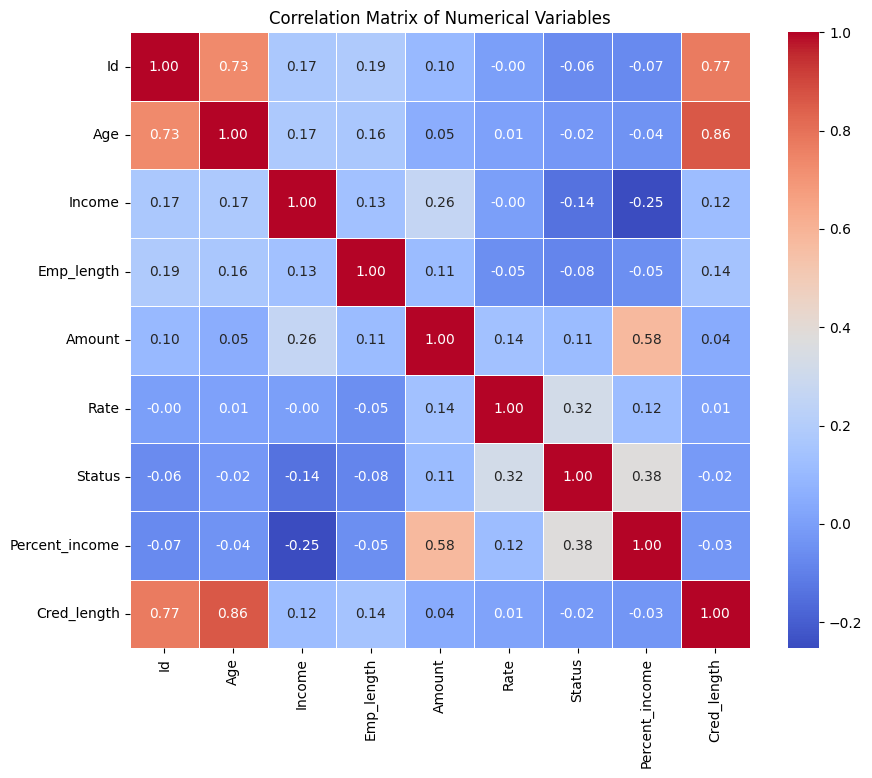

In [ ]:
numerical_data = data[numerical_variables]
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

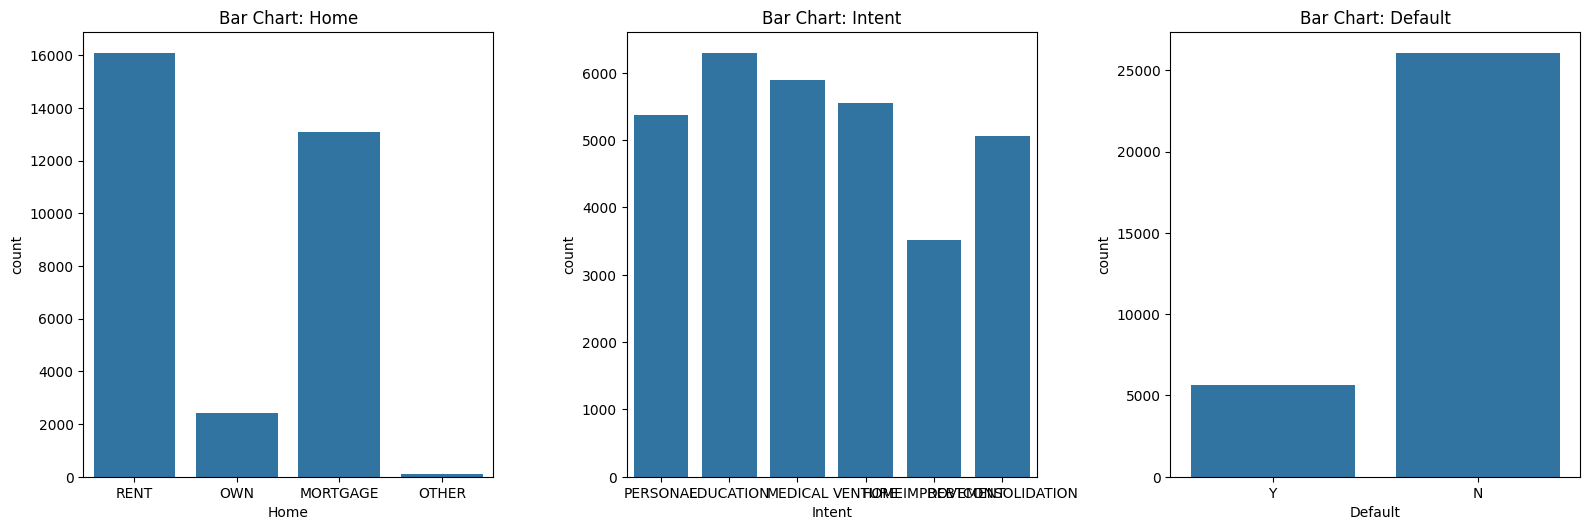

In [ ]:
plt.figure(figsize=(16, 10))

for i, column in enumerate(categorical_variables, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=data)
    plt.title(f'Bar Chart: {column}')

plt.tight_layout()
plt.show()

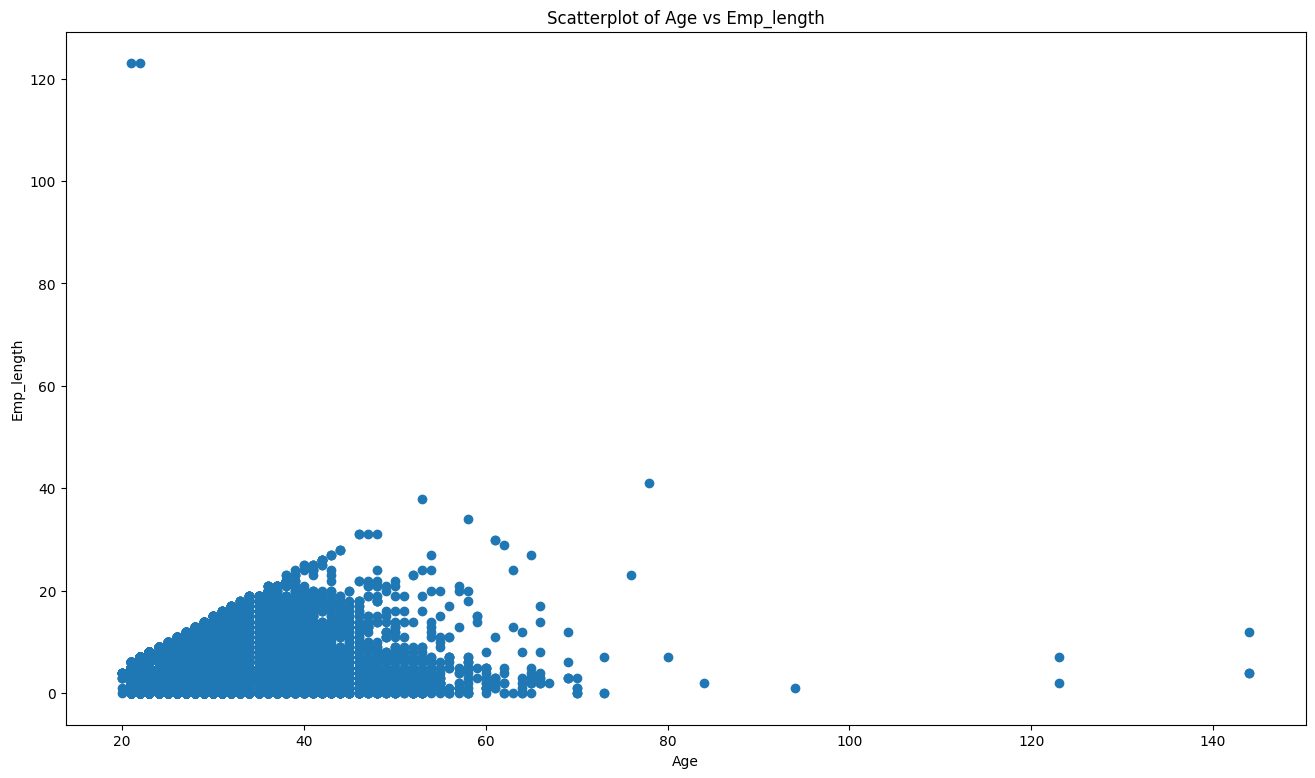

In [ ]:
# Scatterplot for Age vs Employment length
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 9))
plt.scatter(data['Age'], data['Emp_length'])
plt.title('Scatterplot of Age vs Emp_length')
plt.xlabel('Age')
plt.ylabel('Emp_length')

plt.show()

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
data[outliers]
df_no_outliers = data[~outliers]
print(df_no_outliers)

          Id  Age  Income      Home  Emp_length             Intent  Amount  \
1          1   21    9600       OWN         5.0          EDUCATION    1000   
23        23   24   10980       OWN         0.0           PERSONAL    1500   
27        27   23   11000       OWN         0.0           PERSONAL    1400   
59        59   24   12000       OWN         2.0            VENTURE    1750   
65        65   22   12000  MORTGAGE         7.0          EDUCATION    1500   
...      ...  ...     ...       ...         ...                ...     ...   
32258  32258   38   67870  MORTGAGE         6.0            MEDICAL    5000   
32261  32261   37   46680  MORTGAGE         6.0            VENTURE    8000   
32289  32289   40   33000  MORTGAGE         2.0    HOMEIMPROVEMENT    1000   
32290  32290   37   90000  MORTGAGE        11.0  DEBTCONSOLIDATION    4000   
32293  32293   38  110000  MORTGAGE         5.0            MEDICAL   16000   

            Rate  Status  Percent_income Default  Cred_length  

<ipython-input-20-ef203d5c9d6e>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-20-ef203d5c9d6e>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-20-ef203d5c9d6e>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)


In [ ]:
data = df_no_outliers

In [ ]:
data.shape

(20871, 12)

In [ ]:
data.to_csv('cleaned_dataset.csv', index=False)